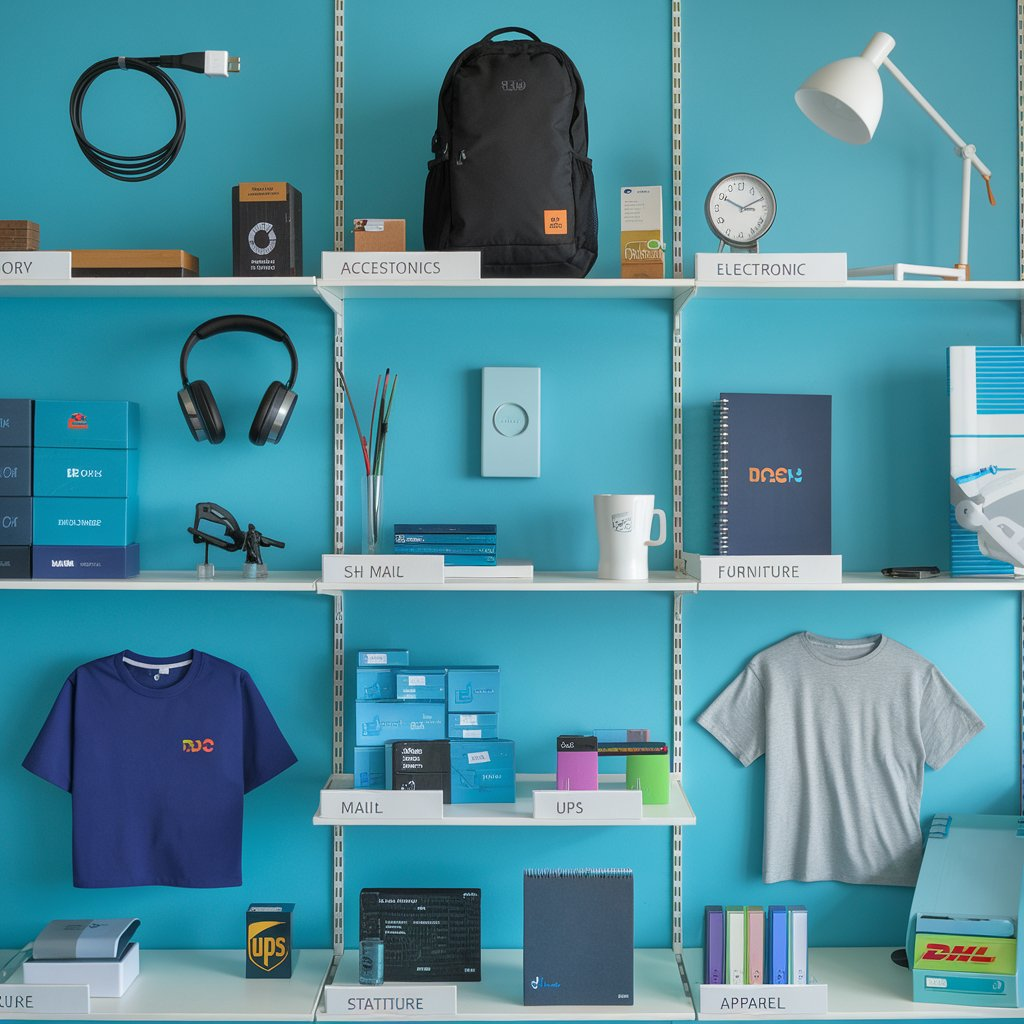

# **Online Retail Project - Exploratory Data Analysis (EDA)**

## **Overview**
This project aims to analyze online retail data to evaluate sales performance, perform customer segmentation, and examine sales trends based on product categories. The dataset includes invoice information, product details, customer identities, and country-based sales data provided by an online retail company.

## **Dataset**
- **Source**: The Online Retail Project dataset encompasses invoices, customer information, and product details related to retail sales.
- **Columns**: Various details such as Invoice No (`InvoiceNo`), Product Code (`StockCode`), Product Description (`Description`), Quantity (`Quantity`), Unit Price (`UnitPrice`), Customer ID (`CustomerID`), and Country (`Country`).
- **Scope**: The data offers a wide range of sales information, including discounts, payment methods, and shipping providers.

## **Project Objectives**
- **Sales Performance**: Analyzing sales by country and product category.
- **Customer Behaviors**: Examining purchasing habits through customer segmentation.
- **Product Trends**: Identifying top-selling products and categories.
- **Price and Discount Impact**: Evaluating the effect of discounts on sales.

## **Analysis Methods**
- **Exploratory Data Analysis (EDA)**: Cleaning data, handling missing values, and conducting basic statistical analysis.
- **Visualization**: Using charts and tables to understand sales trends and illustrate performance.
- **Correlation Analysis**: Evaluating relationships between product prices, sales quantities, and customer segments.

## **Expected Outcomes**
The analysis is expected to provide insights into the distribution of online retail sales by country, identify customer segments, and reveal the sales performance of product categories.

## Step 1: Import Libraries, Loading the Dataset and Initial Exploration

### 1.1 Import Libraries

In [ ]:
import numpy as np  # Used for numerical computations and data manipulation.

import pandas as pd  # Utilized for data analysis and managing data structures (DataFrame, Series).

import matplotlib.pyplot as plt  # Core library for 2D plotting and data visualization.

import seaborn as sns  # Provides statistical data visualizations; built on top of Matplotlib.

import missingno as msno  # Used for visualizing and analyzing missing data.

import plotly.express as px  # Enables interactive plotting and data visualization.

import folium  # Used for map-based visualization (geographic data).

from folium import plugins  # Offers additional plugins and features for Folium maps.

from skimpy import skim  # Provides a quick summary and overview of data.

plt.rcParams["figure.figsize"] = (6,4)  # Sets the default size for plots.

import warnings  # Used to control and manage warning messages.

warnings.filterwarnings("ignore")  # Ignores warning messages.

warnings.warn("this will not show")  # Sample warning message, but will be hidden by the ignore setting.

pd.set_option('display.max_columns', None)  # Ensures all columns are displayed.

pd.set_option('display.max_rows', None)  # Ensures all rows are displayed.

from matplotlib.colors import LinearSegmentedColormap  # Used to create color maps for data visualizations.


### 1.2 Load the dataset 

In [10]:
df=pd.read_csv("online_retail_dataset.csv") #Loading data and assigning to variable

### 1.3 Copy the dataset

In [12]:
df1=df.copy # We got a copy of the data

### 1.4 Display first few rows

In [14]:
df.head() # We have displayed the first 5 lines.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


### 1.5 Check the structure of the dataset.

In [16]:
skim(df) # We took an overview of Data

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   22.37 │   17.92 │     -50 │     11 │     23 │     37 │      49 │    ▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   47.54 │   33.48 │  -99.98 │  23.59 │  48.92 │  74.61 │     100 │    ▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

### 1.6 Inspect the data types and missing values

In [18]:
df.info() # We took an overview of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

### 1.7  Visualization of missing values in a data set

msno.bar(df); kodu, missingno kütüphanesini (genellikle msno olarak kısaltılır) kullanarak veri setindeki eksik değerleri bar grafik şeklinde gösterir.

Her bir bar, bir sütunu temsil eder ve barın yüksekliği, o sütundaki eksik olmayan değerlerin sayısını gösterir.

Bu tür bir görselleştirme, eksik verilerin hangi sütunlarda yoğunlaştığını hızlı bir şekilde anlamanıza yardımcı olabilir.

Eksik verilerin olduğu sütunlar, veri temizleme veya önişleme aşamalarında özel dikkat gerektirebilir.

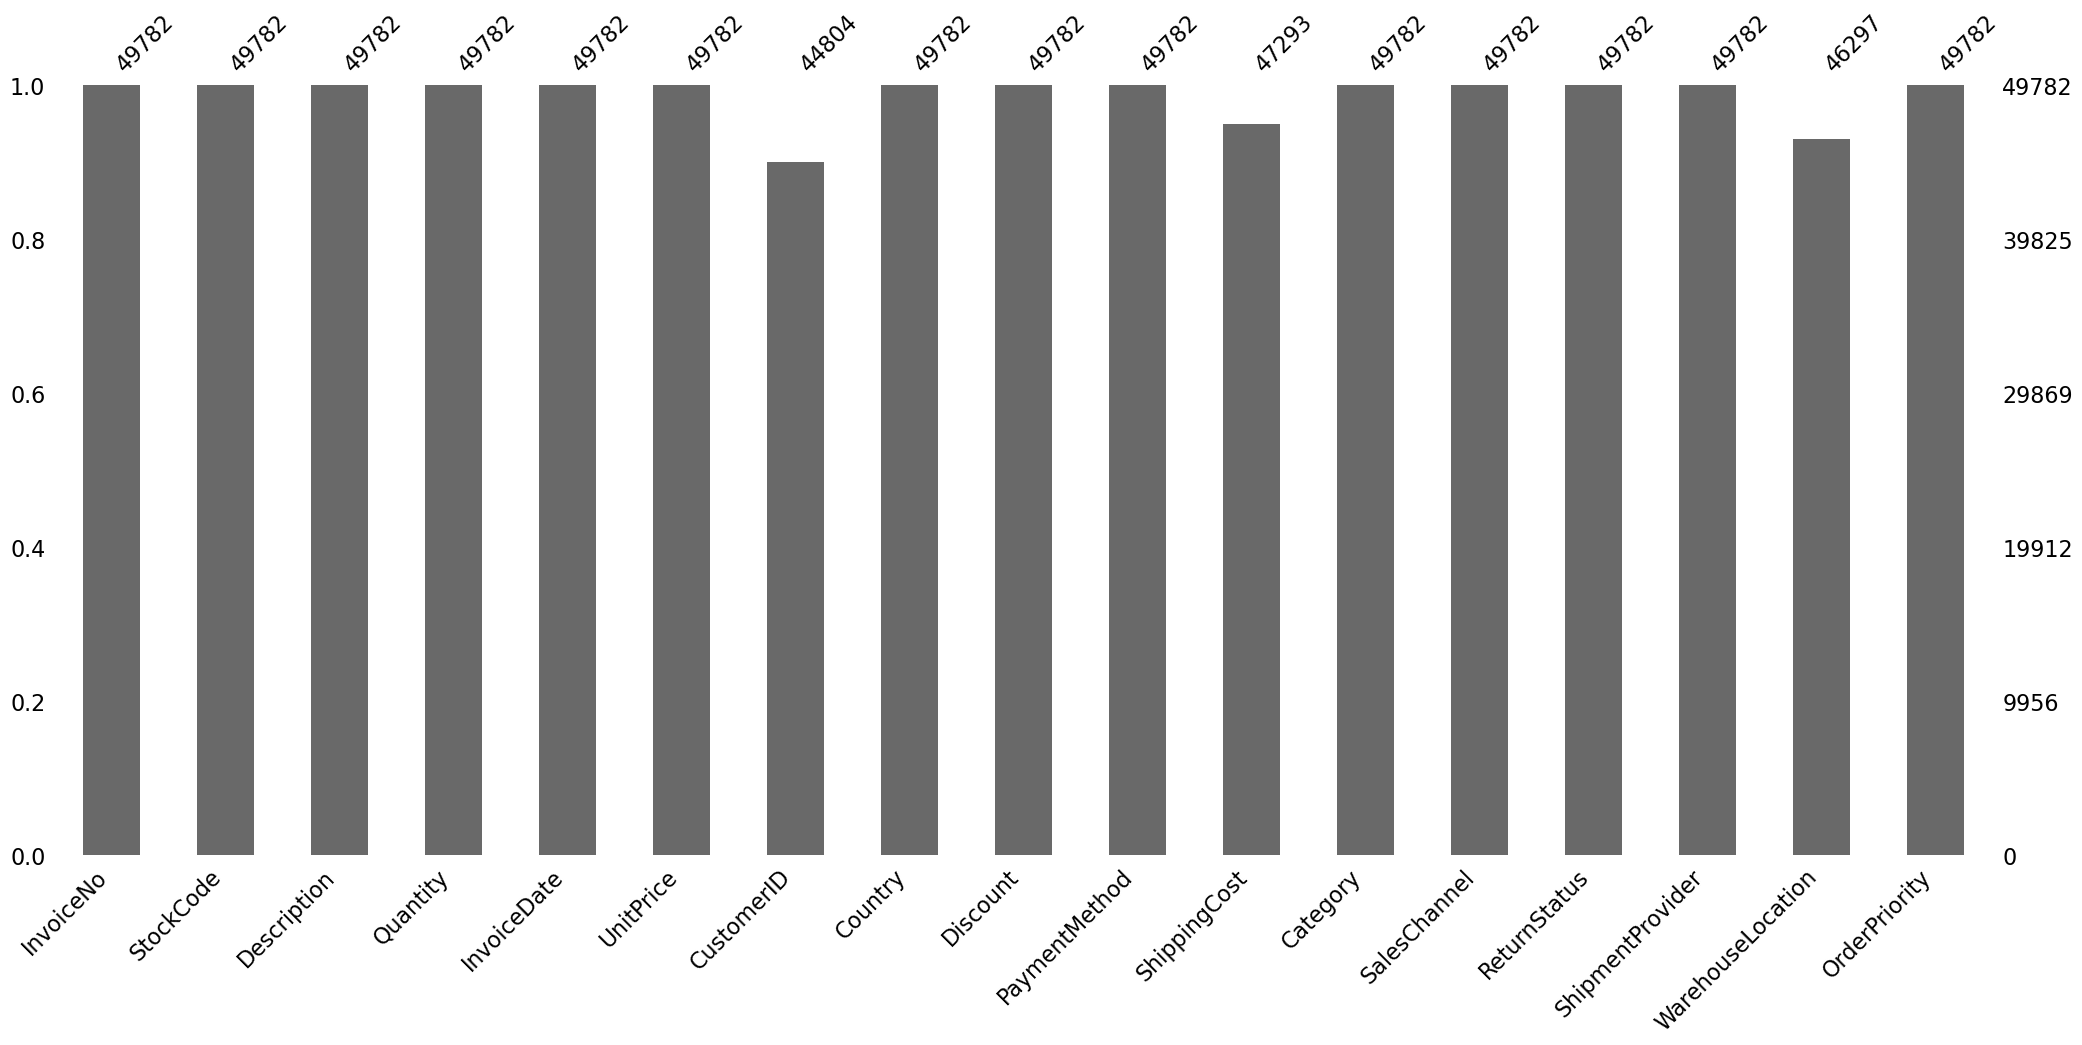

In [21]:
msno.bar(df); # We looked at it in general with the data graph.

### 1.8 Get basic statistics for numerical columns

In [23]:
df.describe().T # We looked at numerical values as statistics

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,49782.0,550681.239946,260703.009944,100005.00,324543.0000,552244.00,776364.00,999997.000000
Quantity,49782.0,22.372343,17.917774,-50.00,11.0000,23.00,37.00,49.000000
UnitPrice,49782.0,47.537862,33.479510,-99.98,23.5925,48.92,74.61,100.000000
CustomerID,44804.0,55032.871775,25913.660157,10001.00,32750.7500,55165.00,77306.25,99998.000000
Discount,49782.0,0.275748,0.230077,0.00,0.1300,0.26,0.38,1.999764
ShippingCost,47293.0,17.494529,7.220557,5.00,11.2200,17.50,23.72,30.000000


## Step 2: Cleaning Inconsistent and Invalid Data

### 2.1 Fixing inconsistent values in 'UnitPrice'
We examined the overall structure of the data and observed that there are inconsistent (negative) values in the 'UnitPrice' column.

In [27]:
# Applying the following condition, we see that there are 1493 negative values in the column.
df[df["UnitPrice"] < 0]["UnitPrice"].count()

1493

In [28]:
# We made the negative values in UnitPrice positive by using the abs() function.
df["UnitPrice"]=df["UnitPrice"].abs()

### 2.2 Cleaning up negative or unrealistic values in 'Quantity'
Data genel yapısını inceledik ve 'Quantity' sütununda tutarsız(negatif) değerlerin olduğunu gözlemledik.

In [30]:
# Applying the following condition, we see that there are 2489 negative values in the column.
df[df["Quantity"] < 0]["Quantity"].count()

2489

In [31]:
# We made the negative values in Quantity positive by using the abs() function.
df["Quantity"]=df["Quantity"].abs()

In [32]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   24.93 │   14.15 │       1 │     13 │     25 │     37 │      50 │ ▇▇▇▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   50.63 │    28.6 │       1 │  25.86 │  50.55 │  75.37 │     100 │ ▇▇▇▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

### 2.3 Standardizing the 'PaymentMethod' column

In [34]:
# We detected the payment method in “PaymentMethod”.
df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
paypall          16505
Name: count, dtype: int64

In [35]:
# "PaymentMethod" içerisindeki "paypall" ödeme yöntemini "Paypall" ile güncelledik.
df["PaymentMethod"].replace("paypall","Paypall",inplace=True)

In [36]:
# We saw the updated final version of “PaymentMethod”.
df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
Paypall          16505
Name: count, dtype: int64

### 2.4 Standardizing the 'StockCode' column
In the “StockCode” column, we changed the data type from “object” to “int” by removing the “SKU_” part, which is seen as redundant. Thus, we made it simpler and more readable.

In [38]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium


In [39]:
df["StockCode"]=df["StockCode"].str.lstrip("SKU_").astype("int")

In [40]:
# We observed that the data timbre has changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  int32  
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

## 2.5 Standardizing the 'CustomerID' column
In the “CustomerID” column, we filled the NaN values as “Unknown” and removed the redundant “.0” value at the end of the Ids.

In [42]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium


In [43]:
# Detection of lines
df["CustomerID"].head(5)

0    37039.0
1    19144.0
2    50472.0
3    96586.0
4        NaN
Name: CustomerID, dtype: float64

In [44]:
# We converted the “NaN” values in the “CustomerID” column to object data type to make them “Unknown”. Here we tried to make them “int” and remove the “.0” values-> 
# Nan didn't allow it because of values.
df["CustomerID"]=df["CustomerID"].astype("object")

In [45]:
# Nan values we filled with “Unknown”.
df["CustomerID"].fillna("Unknown",inplace=True)

In [46]:
# To delete the redundant “.0” value in this line, we changed the data type to “str”. Since “.0” is not deleted all at once, we deleted each character separately.
df["CustomerID"]=df["CustomerID"].astype("str").str.rstrip("0").str.rstrip(".")

In [47]:
# Edited version
df["CustomerID"].head(5)

0      37039
1      19144
2      50472
3      96586
4    Unknown
Name: CustomerID, dtype: object

## 2.6 Standardizing the 'Discount' column
In the values in the “Discount” column, we rounded the excess numbers after .

In [49]:
# We saw the first 5 values in the “Discount” column
df["Discount"].head()

0    0.470000
1    0.190000
2    0.350000
3    0.140000
4    1.501433
Name: Discount, dtype: float64

In [50]:
# After the “.” in “Discount” we edited it to have 2 digits.
df["Discount"]=df["Discount"].round(2)

In [51]:
# Final version after editing “Discount”
df["Discount"].head()

0    0.47
1    0.19
2    0.35
3    0.14
4    1.50
Name: Discount, dtype: float64

## Step 3: Analyzing and Handling Missing Values

## 3.1 Detection and filling of missing values(ShippingCost)
**EN:** We found that the “ShippingCost” column has no significant relationship with the other columns. Therefore, we decided that it would be most appropriate to fill the “ShippingCost” column with its average value. We supported our decision by grouping the “Country”, “ShipmentProvider” and “WarehouseLocation” columns according to the “ShippingCost” column and observing that the average values of these groups are close to the overall “ShippingCost” average.

In [55]:
# "ShippingCost" sütunu NaN değerlerin tespit edilmesi.
# Detection of NaN values in the “ShippingCost” column.
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [56]:
# "ShippingCost" sütun ortalama değer hesaplama
# “ShippingCost” column average value calculation
df["ShippingCost"].mean()

17.49452921151122

In [57]:
# "Country" sütununa göre "ShippingCost" ortalama değer hesaplama
# Calculate “ShippingCost” average value based on “Country” column
df.groupby("Country")["ShippingCost"].mean().mean()

17.49455195055477

In [58]:
# "ShipmentProvider" sütununa göre "ShippingCost" ortalama değer hesaplama
# Calculate “ShippingCost” average value based on "ShipmentProvider" column
df.groupby("ShipmentProvider")["ShippingCost"].mean().mean()

17.494364720265526

In [59]:
# "WarehouseLocation" sütununa göre "ShippingCost" ortalama değer hesaplama
# Calculate “ShippingCost” average value based on "WarehouseLocation" column
df.groupby("WarehouseLocation")["ShippingCost"].mean().mean()

17.48266955767786

In [60]:
# "ShippingCost" sütun NaN değerlerin doldurulması.
# Filling the “ShippingCost” column NaN values.
df["ShippingCost"].fillna(17.49,inplace=True)

In [61]:
# NaN değerlerin dolduğunu kontrol ettik.
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

## 3.2 Detection and filling of missing values(WarehouseLocation)
**EN:** We checked whether there was a relationship with other columns to fill the NaN values in the "WarehouseLocation" column. No relationship was found. Therefore, we decided to fill the NaN values randomly.

In [63]:
# "WarehouseLocation" sütununda ki NaN değerleri gördük.
# We have seen the NaN values in the “WarehouseLocation” column.
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [64]:
# Current values were checked.
df["WarehouseLocation"].value_counts()

WarehouseLocation
Amsterdam    9458
London       9230
Rome         9226
Berlin       9210
Paris        9173
Name: count, dtype: int64

In [65]:
# We've brought the unique version except for NaN.
warehouse_locations = df['WarehouseLocation'].dropna().unique()

In [66]:
# warehouse_locations içerisindeki  değelerden rastgele seçerek 'WarehouseLocation' hücresindeki NaN değerleri doldurur.
# Fills the NaN values in the 'WarehouseLocation' cell by randomly selecting from the values in Warehouse_locations.
df['WarehouseLocation'] =  df['WarehouseLocation'].apply(lambda x: np.random.choice(warehouse_locations) if pd.isna(x) else x)

In [67]:
# Latest status after filling
df["WarehouseLocation"].value_counts()

WarehouseLocation
Amsterdam    10132
Rome          9922
London        9920
Berlin        9907
Paris         9901
Name: count, dtype: int64

In [68]:
# We checked that the NaN values are full.
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

## Step 4: Detecting and Handling Outliers

### 4.1 Detecting and Handling Outliers in Quantity
**EN=** In the “Quantity” column, we determined that there is no outlier value with the boxplot chart.

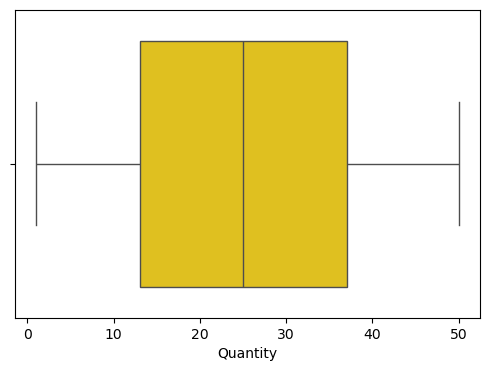

In [72]:
plt.figure()
sns.boxplot(x="Quantity",data=df,color="#ffd600");

### 4.2 Detecting and Handling Outliers in UnitPrice
**EN=** In the “UnitPrice” column, we determined that there is no outlier value with the boxplot chart.

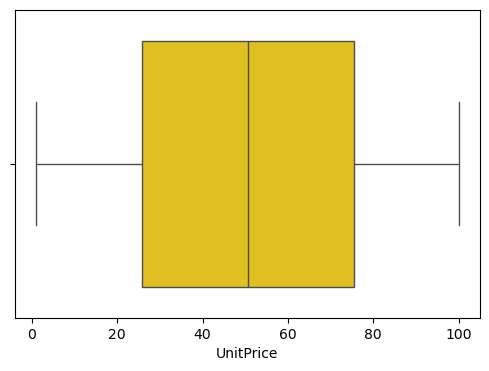

In [74]:
plt.figure()
sns.boxplot(x="UnitPrice",data=df,color="#ffd600");

### 4.3 Detecting and Handling Outliers in Discount
**EN=** Detection of outlier values in the “Discount” column with boxplot and deletion of outlier values.

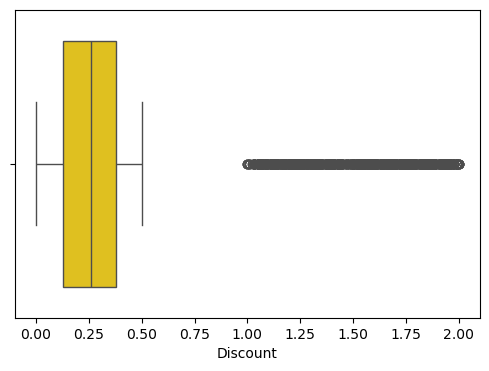

In [76]:
plt.figure()
sns.boxplot(x="Discount",data=df,color="#ffd600");

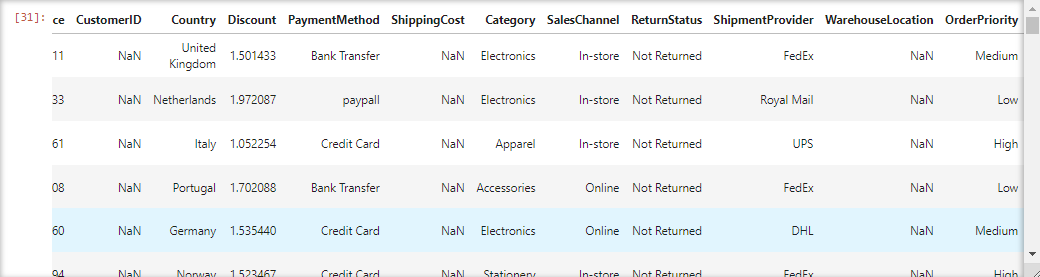

In [78]:
# Finding Q1,Q2,Q3 values.
Q1=df["Discount"].quantile(0.25)
Q2=df["Discount"].quantile(0.50)
Q3=df["Discount"].quantile(0.75)
print(f"Q1={Q1}, Q2={Q2}, Q3={Q3}")

Q1=0.13, Q2=0.26, Q3=0.38


In [79]:
# Finding IQR, MIN, MAX values and visualizing outlier values with boxplot.
# Q1=0.13,Q2=0.26,Q3=0.38
# IQR= Q3-Q1 -->  0.38- 0.13= 0.25
# MİN= Q1-(1.5 * IQR) --> 0.13-(1.5 * 0.25) = - 0,245
# MAX= Q3+(1.5 * IQR) --> 0.38+(1.5 * 0.25) = 0,755

In [80]:
# We have shown the number of outlier values.
df[df["Discount"] > 0.755]["Discount"].count()

996

In [81]:
# With reference to the MAX value, we took all values below 0.755 and removed all outlier values.
df=df[df["Discount"] <= 0.755]

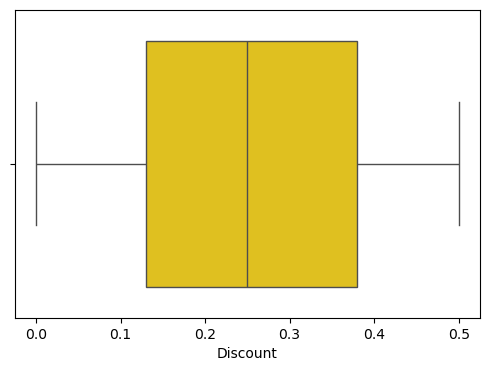

In [82]:
# Here we saw outlie values being erased.
plt.figure()
sns.boxplot(x="Discount",data=df,color="#ffd600");

### 4.4 Detecting and Handling Outliers in ShippingCost
**EN=** In the “ShippingCost” column, we determined that there is no outlier value with the boxplot chart.

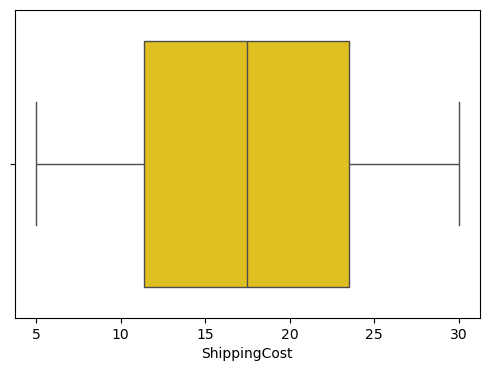

In [84]:
plt.figure()
sns.boxplot(x="ShippingCost",data=df,color="#ffd600");

## Step 5: Feature Engineering

### 5.1 Create new feature 'TotalCost'

In [88]:
# We have calculated the total cost.
df["TotalCost"]=((df["UnitPrice"] * df["Quantity"]) - (df["UnitPrice"] * df["Quantity"]) * df["Discount"] + df["ShippingCost"]).round(2)

In [89]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost
0,221958,1964,White Mug,38,2020-01-01 00:00,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,45.23


### 5.2  Separate year, month, day and hour from 'InvoiceDate' column
**EN=** Place the data in the 'InvoiceDate' column into separate columns.

In [91]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost
0,221958,1964,White Mug,38,2020-01-01 00:00,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,45.23


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48786 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          48786 non-null  int64  
 1   StockCode          48786 non-null  int32  
 2   Description        48786 non-null  object 
 3   Quantity           48786 non-null  int64  
 4   InvoiceDate        48786 non-null  object 
 5   UnitPrice          48786 non-null  float64
 6   CustomerID         48786 non-null  object 
 7   Country            48786 non-null  object 
 8   Discount           48786 non-null  float64
 9   PaymentMethod      48786 non-null  object 
 10  ShippingCost       48786 non-null  float64
 11  Category           48786 non-null  object 
 12  SalesChannel       48786 non-null  object 
 13  ReturnStatus       48786 non-null  object 
 14  ShipmentProvider   48786 non-null  object 
 15  WarehouseLocation  48786 non-null  object 
 16  OrderPriority      48786 no

In [93]:
# We changed the data type “InvoiceDate” to Date.
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [94]:
# We threw the year information in the “InvoiceDate” column into it by creating an “InvoiceYear” column.
df["InvoiceYear"]=pd.to_datetime(df["InvoiceDate"]).dt.year

In [95]:
# We threw the month information in the “InvoiceDate” column into it by creating an “InvoiceMounth” column.
df["InvoiceMonth"]=pd.to_datetime(df["InvoiceDate"]).dt.month

In [96]:
# We threw the day information in the “InvoiceDate” column into it by creating an “InvoiceDay” column.
df["InvoiceDay"]=pd.to_datetime(df["InvoiceDate"]).dt.day

In [97]:
# We threw the time information in the “InvoiceDate” column into it by creating an “InvoiceTime” column.
df["InvoiceTime"]=pd.to_datetime(df["InvoiceDate"]).dt.time

In [98]:
# We deleted the information in the “InvoiceDate” column.
df.drop(columns="InvoiceDate",axis=1,inplace=True)

In [99]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime
0,221958,1964,White Mug,38,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,45.23,2020,1,1,00:00:00


## 5.3 Correction of values in the incorrect Category column


In [101]:
# Correction of incorrect Category Column

In [102]:
# We saw the mistakes in the Category Sutun.
df.groupby(["Category","Description"]).size()

Category     Description   
Accessories  Backpack          904
             Blue Pen          864
             Desk Lamp         877
             Headphones        859
             Notebook          911
             Office Chair      902
             T-shirt           852
             USB Cable         883
             Wall Clock        925
             White Mug         919
             Wireless Mouse    877
Apparel      Backpack          864
             Blue Pen          895
             Desk Lamp         898
             Headphones        907
             Notebook          835
             Office Chair      878
             T-shirt           899
             USB Cable         911
             Wall Clock        895
             White Mug         841
             Wireless Mouse    861
Electronics  Backpack          878
             Blue Pen          876
             Desk Lamp         894
             Headphones        894
             Notebook          852
             Office Chair  

In [103]:
# We made a correct grouping for the Category column.
Category = {
    'Backpack': 'Accessory',
    'Blue Pen': 'Stationer',
    'Notebook': 'Stationer',
    'Office Chair': 'Furniture',
    'Wall Clock': 'Accessory',
    'White Mug': 'Accessory',
    'Wireless Mouse': 'Electronics',
    'USB Cable': 'Electronics',
    'Headphones': 'Electronics',
    'T-shirt': 'Apparel',
    'Desk Lamp':'Accessory'
}

In [104]:
# We updated the “Category” column with the grouping we made.
df['Category'] = df['Description'].map(Category)

In [105]:
# We have seen the Category column recovering.
df.groupby(["Category","Description"]).size()

Category     Description   
Accessory    Backpack          4480
             Desk Lamp         4456
             Wall Clock        4501
             White Mug         4451
Apparel      T-shirt           4381
Electronics  Headphones        4450
             USB Cable         4502
             Wireless Mouse    4354
Furniture    Office Chair      4431
Stationer    Blue Pen          4417
             Notebook          4363
dtype: int64

## Step 6: Data Visualization

### 6.1 Sales Distribution by Country
**EN:**  We visualized total sales volumes by country.

In [108]:
# Bar chart for Total Cost by country

In [109]:
# We made a country-based total sales volume calculation.
total_cost_by_country=df.groupby("Country")["TotalCost"].sum().sort_values(ascending=False)
total_cost_by_country

Country
Belgium           4039735.26
Sweden            3986722.16
United Kingdom    3985433.67
United States     3958837.41
Germany           3946976.16
France            3920133.19
Portugal          3903108.64
Spain             3878873.43
Norway            3877461.99
Italy             3851780.50
Australia         3822776.49
Netherlands       3768055.08
Name: TotalCost, dtype: float64

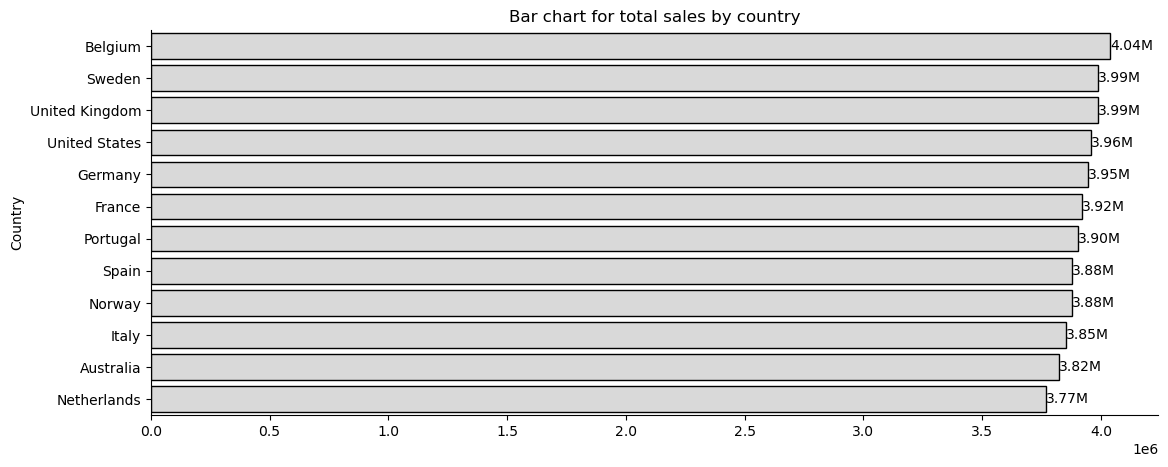

In [290]:
# We made a visualization in the bar chart using the “total_cost_by_country” dataframe we created above.
plt.figure(figsize=(13,5))
ax=sns.barplot(x=total_cost_by_country.values,
               y=total_cost_by_country.index,
               ci=None)
plt.title("Bar chart for total sales by country")
top_two = total_cost_by_country.nlargest(3)
for p in ax.patches:
        p.set_color('#d9d9d9')  # Diğer çubukların rengi
        p.set_linewidth(1)      # Çizgi kalınlığını değiştirme
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)

for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.2f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

### 6.2 Payment Method Usage
**EN:** Visualization of payment methods with Pie Chart.

In [112]:
# Pie chart for payment methods

In [113]:
# We have identified the total number of payment methods.
pament_method=df["PaymentMethod"].value_counts()
pament_method

PaymentMethod
Bank Transfer    16439
Credit Card      16214
Paypall          16133
Name: count, dtype: int64

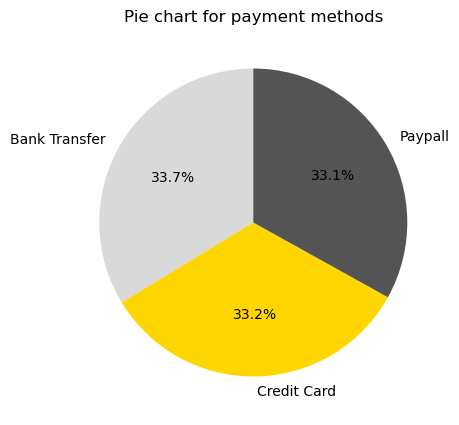

In [114]:
# Using the “pament_method” dataframe we created above, we made a visualization in the pie chart graph.
plt.figure(figsize=(10,5))
plt.pie(
        pament_method,
        labels=pament_method.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#d9d9d9","#ffd600","#545454"]
       )
plt.title("Pie chart for payment methods");

### 6.4 Total sales figures by month in Data

In [122]:
# Total monthly sales listed
InvoiceMonth_Totalcost=df.groupby("InvoiceMonth")["TotalCost"].sum()
InvoiceMonth_Totalcost

InvoiceMonth
1     4200564.45
2     3832852.39
3     4209414.65
4     4091330.47
5     4158310.25
6     4064771.28
7     4134075.00
8     4245557.54
9     3524791.07
10    3549283.46
11    3435907.45
12    3493035.97
Name: TotalCost, dtype: float64

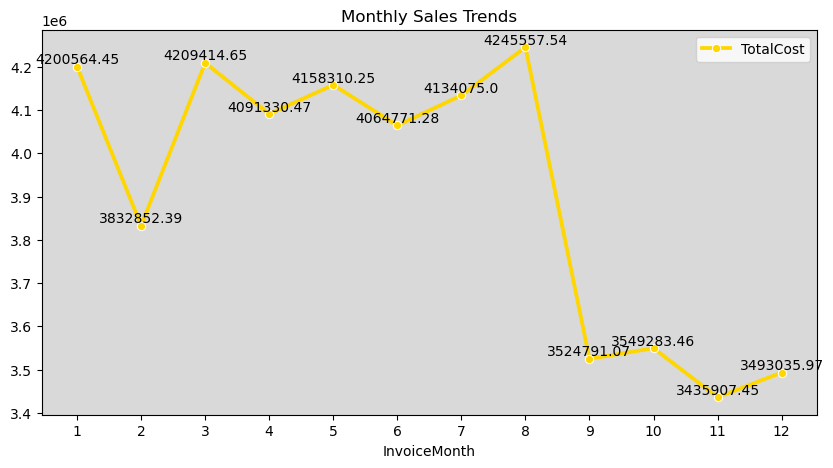

In [123]:
# Overall total sales figures by month were visualized.
plt.figure(figsize=(10,5))
ax=sns.lineplot( x=InvoiceMonth_Totalcost.index, y=InvoiceMonth_Totalcost.values, marker='o',label="TotalCost",color="#ffd600",linewidth=2.7)
ax.set_facecolor("#d9d9d9")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]);
plt.title("Monthly Sales Trends");
for x, y in zip(InvoiceMonth_Totalcost.index, InvoiceMonth_Totalcost.values):
    plt.text(x, y, f'{y}',
             ha='center', 
             va='bottom')

### 6.5 Quantity and TotalCost Correlation

In [125]:
# Scatter plot for quantity and total cost

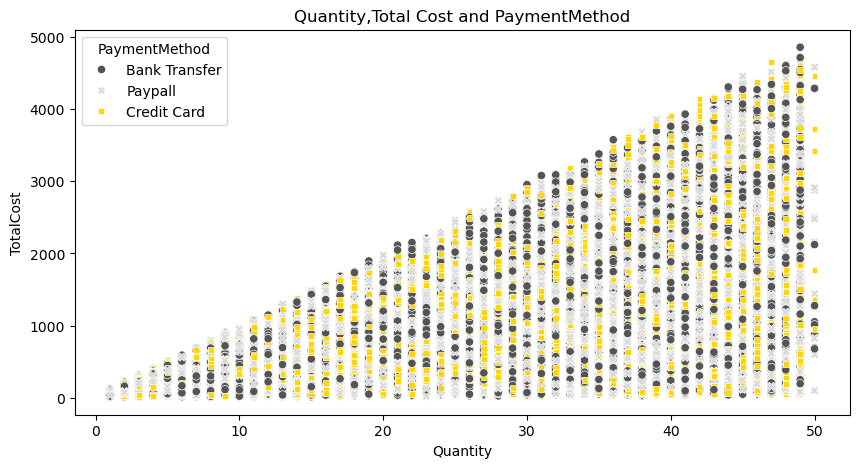

In [126]:
# We have seen the distribution of payment methods based on Total cost and Quantity.
plt.figure(figsize=(10,5))
sns.scatterplot(
                data=df,
                x="Quantity",
                y="TotalCost",
                hue="PaymentMethod",
                style="PaymentMethod",
                palette={
                         "Bank Transfer": "#545454",
                         "Paypall": "#d9d9d9",
                         "Credit Card":"#ffd600"
                        }
                )
plt.title("Quantity,Total Cost and PaymentMethod");

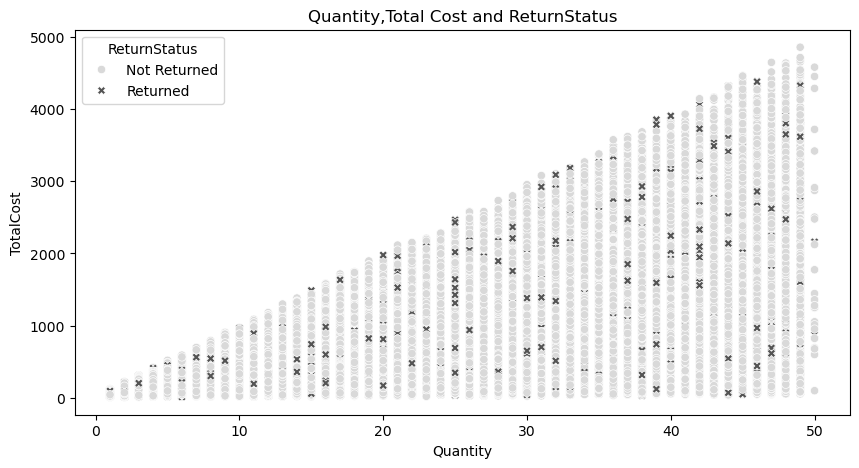

In [127]:
# We have seen the distribution of ReturnStatus based on Total cost and Quantity.
plt.figure(figsize=(10,5))
sns.scatterplot(
                data=df,
                x="Quantity",
                y="TotalCost",
                hue="ReturnStatus",
                style="ReturnStatus",
                palette={
                         "Returned": "#545454",
                         "Not Returned": "#d9d9d9"
                        }
               )
plt.title("Quantity,Total Cost and ReturnStatus");

### 6.6 ShippingCost and Quantity Correlation
** EN:**  We checked whether there is a correlation between ShippingCost and Quantity depending on OrderPriority.

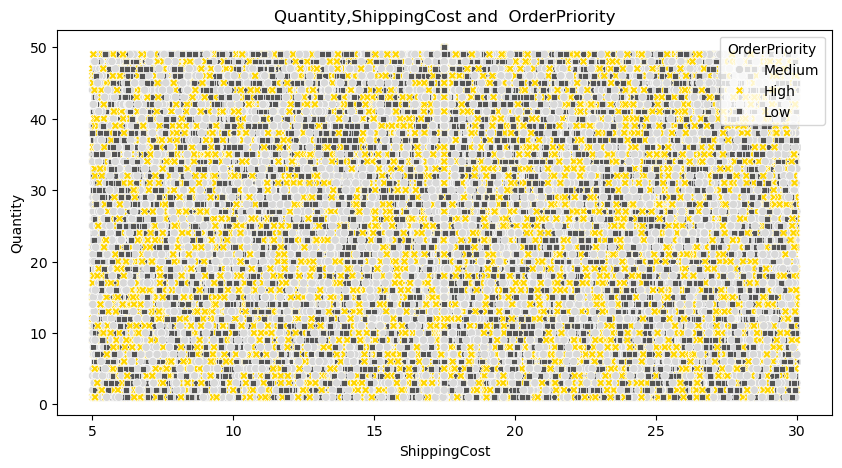

In [129]:
plt.figure(figsize=(10,5))
sns.scatterplot(
                data=df,
                x="ShippingCost",
                y="Quantity",
                hue="OrderPriority",
                style="OrderPriority",
                palette={
                         "Low": "#545454",
                         "Medium": "#d9d9d9",
                         "High":"#ffd600"
                        }
               );
plt.title("Quantity,ShippingCost and  OrderPriority");

 ** EN: **  We checked whether there is a correlation between ShippingCost and TotalCost depending on OrderPriority.

### 6.7 Shipping Cost Analysis

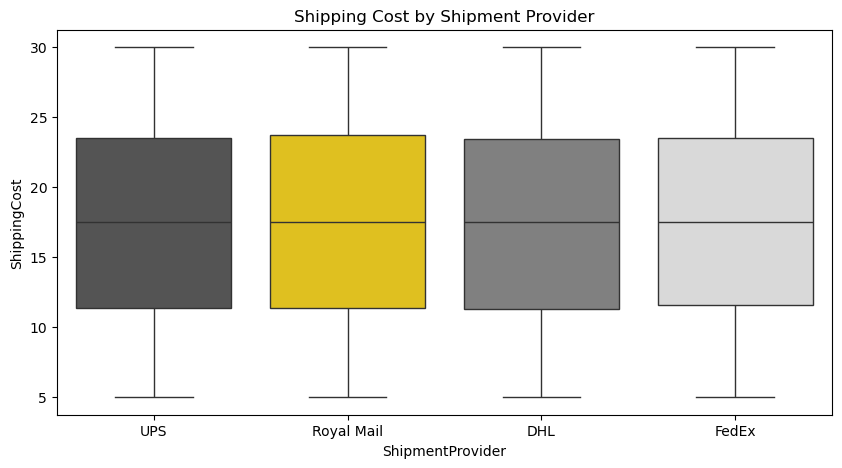

In [133]:
# Boxplot for shipping cost by shipment provider
plt.figure(figsize=(10,5))
sns.boxplot(
    data= df,
    x="ShipmentProvider",
    y="ShippingCost",
    palette={
            "#545454",
            "#D9D9D9",
            "#FFD600", 
            "#808080"
            }
            );
plt.title("Shipping Cost by Shipment Provider");

### 6.8 Top Performing Products

In [135]:
# Bar chart for top 10 products by revenue

In [136]:
# List of total sales volume by product
Top_Performing_Products=df.groupby("Description")["TotalCost"].sum().sort_values(ascending=False)
Top_Performing_Products

Description
White Mug         4388500.43
USB Cable         4341416.70
Desk Lamp         4284698.73
Wall Clock        4283150.15
Headphones        4277776.50
Backpack          4276568.39
Blue Pen          4273240.86
Wireless Mouse    4245664.21
Notebook          4201949.24
Office Chair      4192376.91
T-shirt           4174551.86
Name: TotalCost, dtype: float64

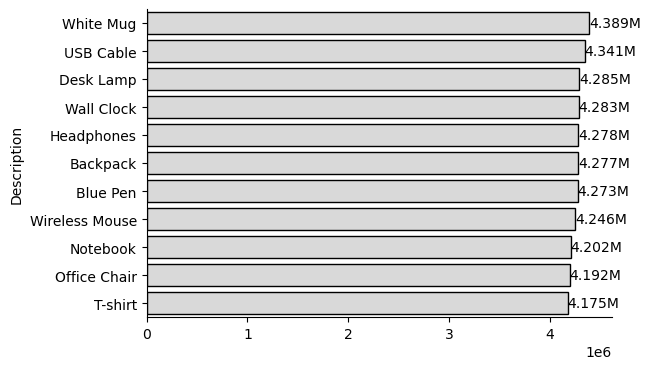

In [137]:
# Chart of total sales quantity to products
plt.figure()
ax=sns.barplot(x=Top_Performing_Products.values,y=Top_Performing_Products.index)
for p in ax.patches:
        p.set_color('#d9d9d9')  # Diğer çubukların rengi
        p.set_linewidth(1)      # Çizgi kalınlığını değiştirme
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

### 6.9 Customer Behavior Analysis
**EN:** In this correlation relationship, there is a positive correlation of 0.63 between Total cost and Quantitiy, that is, there is a positive correlation, that is, when one increases, the other increases. Since the other relationships are very close to zero, we observed that there is no correlation, that is, there is no relationship between them.

In [139]:
# Heatmap for customer spending

In [140]:
# Here we calculated correlation in columns containing numerical values.
corr=df[["Quantity","TotalCost","ShippingCost"]].corr()

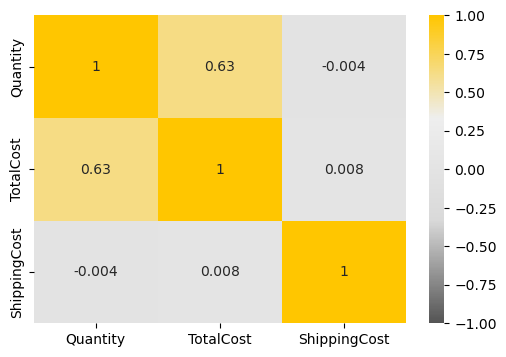

In [141]:
# Visualization with Heatmap
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", ["#545454", "#D9D9D9", "#EEEEEE", "#FFC600"])
plt.figure()
sns.heatmap(corr, annot=True, cmap=custom_cmap, vmin=-1, vmax=1);

### 6.10 Order Return Analysis
**EN:** Returned products have been identified.

In [143]:
# Bar chart for returned vs not returned

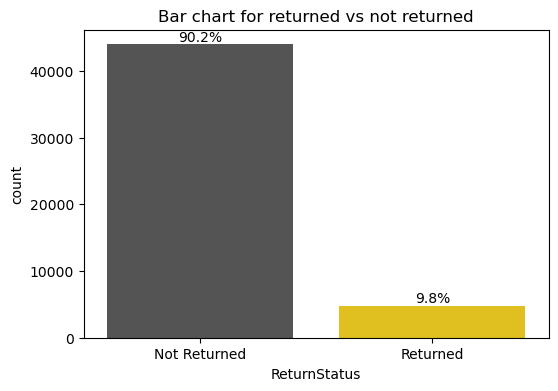

In [144]:
# We visualized the returned and non-returned products in the Bar Chart.
ax=sns.countplot(data=df,x="ReturnStatus",palette={"#545454","#FFD600"})
total = len(df)
plt.title("Bar chart for returned vs not returned")
for p in ax.patches:
    height = p.get_height()  # Çubuğun yüksekliği (kategori sayısı)
    percentage = '{:.1f}%'.format(100 * height / total)  # % değeri hesaplama
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  # % değerini çubuğun ortasına yazdırma

In [145]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,InvoiceSeason
0,221958,1964,White Mug,38,1.71,37039,Australia,0.47,Bank Transfer,10.79,Accessory,In-store,Not Returned,UPS,London,Medium,45.23,2020,1,1,00:00:00,Winter
1,771155,1241,White Mug,18,41.25,19144,Spain,0.19,Paypall,9.51,Accessory,Online,Not Returned,UPS,Rome,Medium,610.93,2020,1,1,01:00:00,Winter
2,231932,1501,Headphones,49,29.11,50472,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,950.18,2020,1,1,02:00:00,Winter
3,465838,1760,Desk Lamp,14,76.68,96586,Netherlands,0.14,Paypall,11.08,Accessory,Online,Not Returned,Royal Mail,Rome,Low,934.31,2020,1,1,03:00:00,Winter
5,744167,1006,Office Chair,47,70.16,53887,Sweden,0.48,Credit Card,13.98,Furniture,Online,Not Returned,DHL,London,Medium,1728.69,2020,1,1,05:00:00,Winter


In [146]:
# We analyzed returned and non-returned products on a regional basis in the Bar Chart.

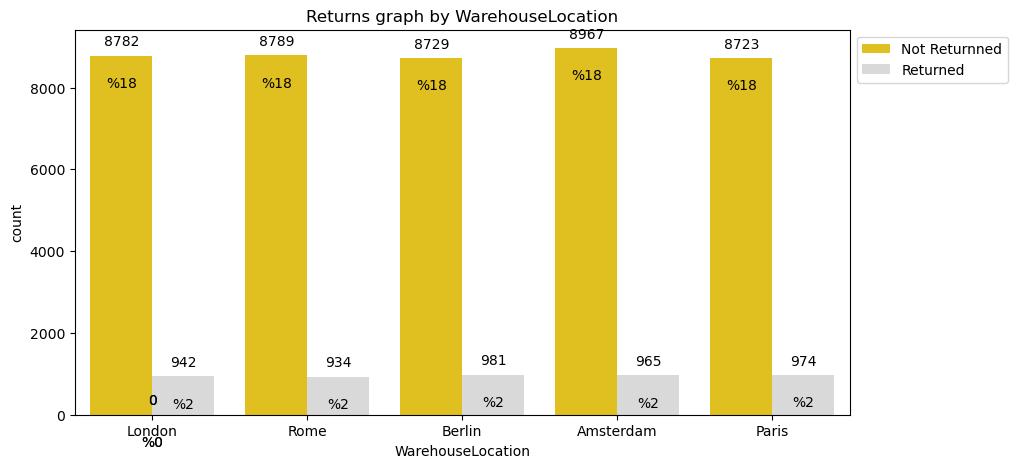

In [147]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "WarehouseLocation", hue = "ReturnStatus",palette={"#FFD600","#D9D9D9"})
total = len(df) # Barların üzerine hem sayısal hem de yüzdesel değer ekleme
total = len(df) # Barların üzerine hem sayısal hem de yüzdesel değer ekleme
plt.title("Returns graph by WarehouseLocation")
for p in ax.patches:
    height = p.get_height()  # Barın yüksekliği (sayısal değer)
    # Sayısal değeri yazdırma
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    # Yüzdesel değeri hesaplama ve yazdırma (barın daha içinde kalacak şekilde ayarlanmış)
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')
plt.legend(['Not Returnned', 'Returned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

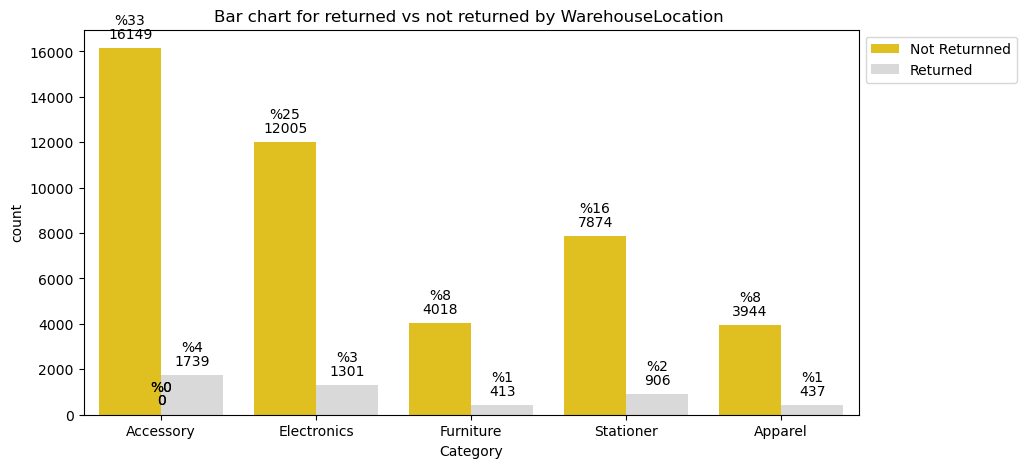

In [148]:
# We visualized the returned and non-returned products according to the warehouse sent in the bar chart.
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "Category", hue = "ReturnStatus", palette={"#FFD600","#D9D9D9"})
total = len(df)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points')
    plt.legend(['Not Returnned', 'Returned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Bar chart for returned vs not returned by WarehouseLocation ")
plt.show()

### 6.11 Sales Channel Analysis
**EN:** Analyzed according to sales channels.

In [150]:
# Bar chart for sales by channel

In [151]:
Sales_Channel=df["SalesChannel"].value_counts()

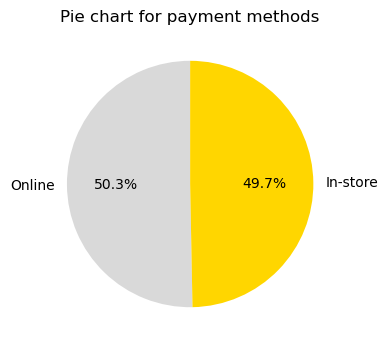

In [152]:
# Sales channels ratios visualized with the Pie chart.
plt.figure()
plt.pie(
        Sales_Channel,
        labels=Sales_Channel.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#d9d9d9","#ffd600","#545454"]
       )
plt.title("Pie chart for payment methods");

### 6.12 Category - Payment method rates
**EN:** Realized payment method rates by product category

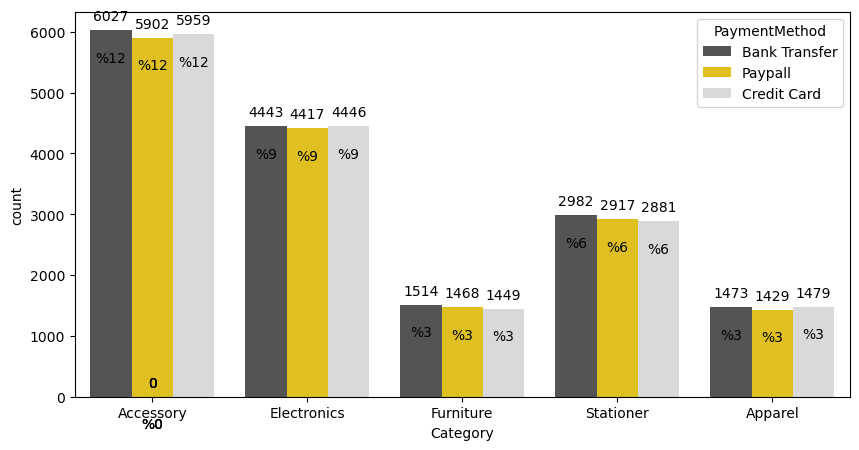

In [154]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "Category", hue = "PaymentMethod",palette={"#545454","#FFD600","#D9D9D9"})
total = len(df)
total = len(df)
for p in ax.patches:
    height = p.get_height() 
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')
plt.show()

### 6.13 Top 10 CustomerID by TotalCost
**EN:** Top 10 custumer id visualization by Total Cost.

In [156]:
# Top 10 liste dataframe oluşturduk.
top_10_customer_id=df.groupby("CustomerID")["TotalCost"].sum().sort_values(ascending=False).head(11)
top_10_customer_id=pd.DataFrame(top_10_customer_id).reset_index()
top_10_customer_id=top_10_customer_id[top_10_customer_id["CustomerID"] != "Unknown"]
top_10_customer_id

,CustomerID,TotalCost
1,84431,9824.97
2,81067,9741.42
3,81631,8776.23
4,98923,8719.21
5,80001,8599.53
6,76402,8269.63
7,29700,8068.44
8,72172,7913.42
9,52808,7883.90
10,26371,7763.11


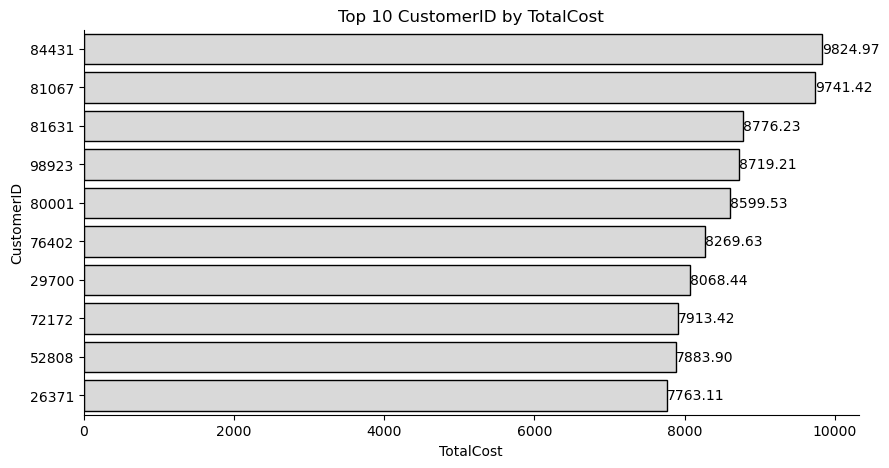

In [157]:
# We made visualization with bar chart.
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_10_customer_id,y="CustomerID",x="TotalCost")
plt.title("Top 10 CustomerID by TotalCost")
for p in ax.patches:
        p.set_color('#D9D9D9')  # Diğer çubukların rengi
        p.set_linewidth(1)      # Çizgi kalınlığını değiştirme
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-0:.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [158]:
# List of the number of invoices of Customer IDs in the Top 10 list.

In [159]:
customer_ids = ['84431', '81067', '81631', '98923', '80001', '76402', '29700', '72172', '52808', '26371']
# Bu CustomerID'leri filtreleyip value_counts ile saydırma
top_10_Invoice_count=pd.DataFrame(df[df["CustomerID"].isin(customer_ids)]["CustomerID"].value_counts()).reset_index()
top_10_Invoice_count

,CustomerID,count
0,81631,5
1,76402,4
2,80001,4
3,72172,3
4,81067,3
5,52808,3
6,98923,3
7,26371,3
8,84431,3
9,29700,2


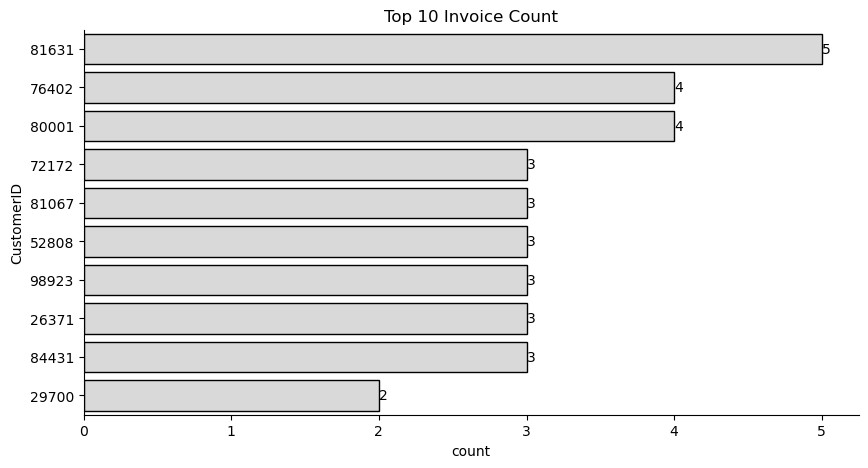

In [160]:
# Visualization of invoice numbers
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_10_Invoice_count,y="CustomerID",x="count")
plt.title("Top 10 Invoice Count")
for p in ax.patches:
        p.set_color('#D9D9D9')  # Diğer çubukların rengi
        p.set_linewidth(1)      # Çizgi kalınlığını değiştirme
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-0:.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

### 6.14 Top 10 Product
 We obtained information on the total sales amount of the products.

In [162]:
product_count=df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
product_count

Description
USB Cable         113136
Wall Clock        112210
White Mug         111862
Backpack          111267
Desk Lamp         111006
Blue Pen          110113
Office Chair      109938
Headphones        109855
Wireless Mouse    109718
T-shirt           108622
Notebook          108197
Name: Quantity, dtype: int64

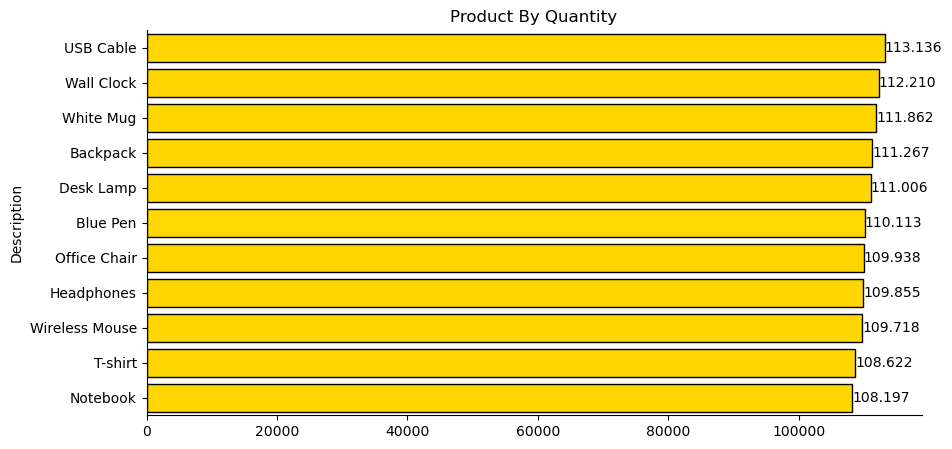

In [163]:
plt.figure(figsize=(10,5))
ax=sns.barplot(
    x=product_count.values,
    y=product_count.index,
    color="#FFD600"
              );
plt.title("Product By Quantity")
for p in ax.patches:
        p.set_color('#FFD600')  # Diğer çubukların rengi
        p.set_linewidth(1)      # Çizgi kalınlığını değiştirme
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-3:.3f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')